In [1]:
# from google.colab import drive
# drive.mount('/DataSets/dataframe_benign_portscan.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:

path='DataSets/dataframe_benign_portscan.csv'
df = pd.read_csv(path)
df.columns = [col.lstrip() for col in df.columns] # delete a space before name of the columns

In [3]:
# Пример предобработки данных
# df.fillna(df.mean(), inplace=True)  # Замена пропущенных значений средним (если пропущенные значения есть)

# Разделение на признаки и целевую переменную
X = df.drop('Label', axis=1)

y = df['Label']
print(y.unique())

['BENIGN' 'PortScan']


In [4]:
# Разделение на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Обучение модели (например, RandomForest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Оценка производительности модели
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     25459
    PortScan       1.00      1.00      1.00     31761

    accuracy                           1.00     57220
   macro avg       1.00      1.00      1.00     57220
weighted avg       1.00      1.00      1.00     57220



In [7]:
# Анализ важности признаков
feature_importances = clf.feature_importances_


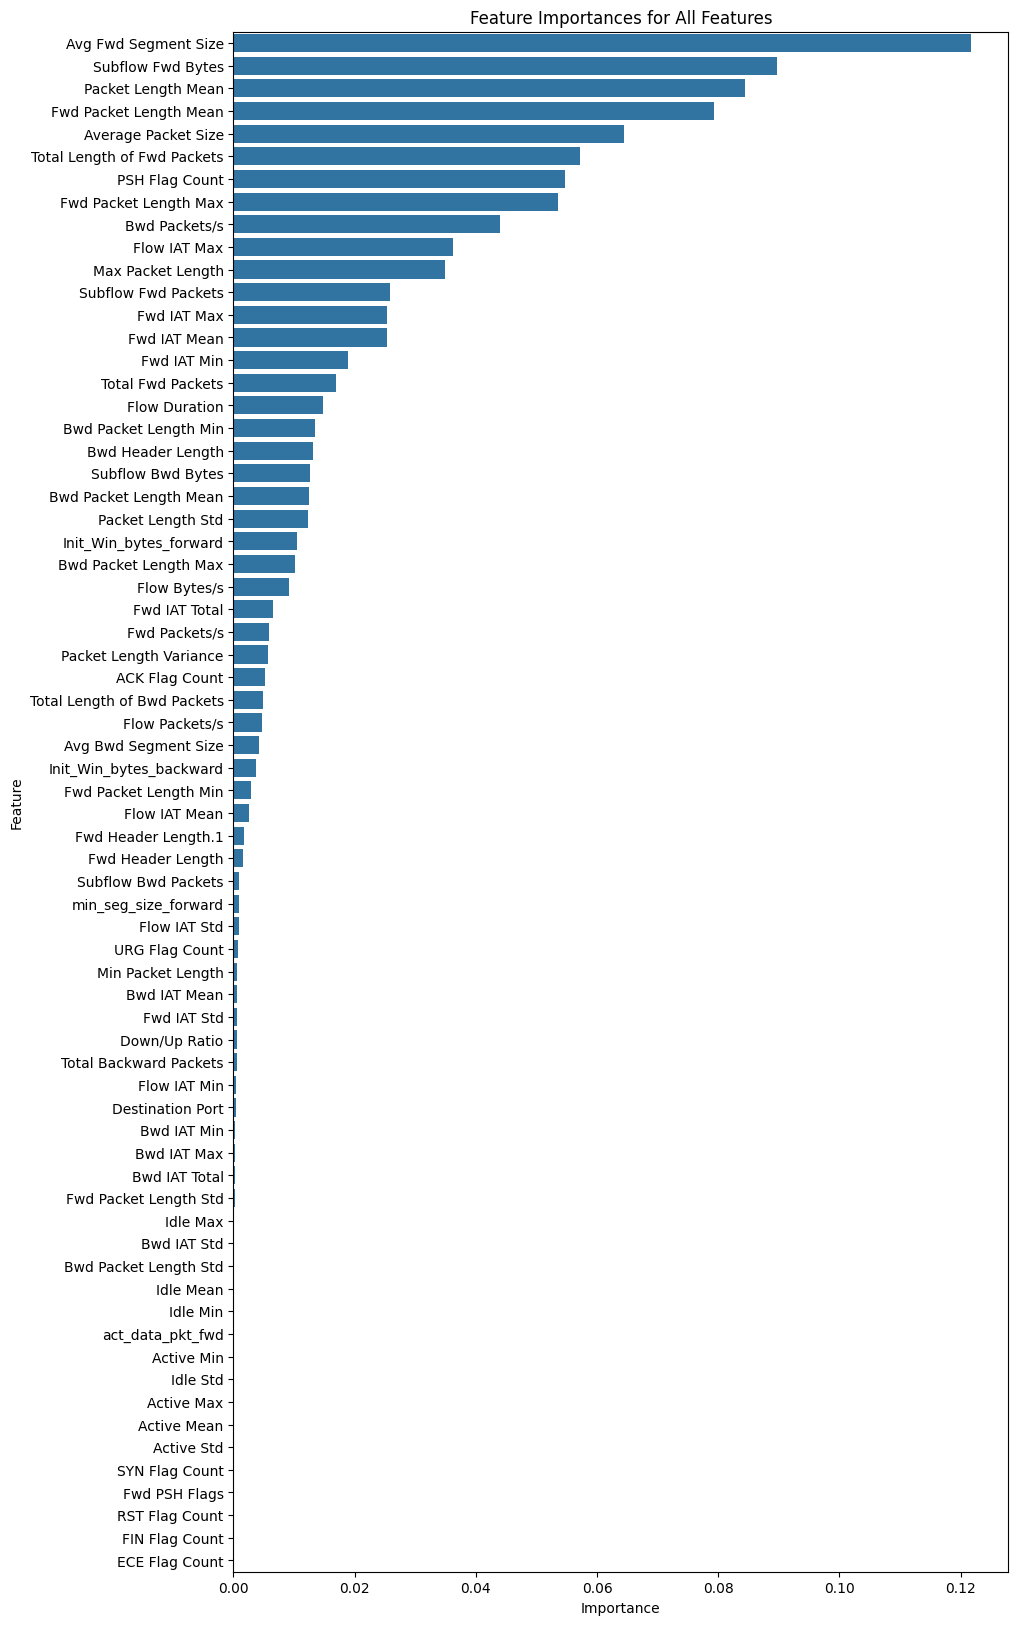

                   Feature    Importance
49    Avg Fwd Segment Size  1.217847e-01
53       Subflow Fwd Bytes  8.968509e-02
37      Packet Length Mean  8.446143e-02
8   Fwd Packet Length Mean  7.935782e-02
48     Average Packet Size  6.439281e-02
..                     ...           ...
41          SYN Flag Count  8.713653e-07
30           Fwd PSH Flags  3.185827e-07
42          RST Flag Count  0.000000e+00
40          FIN Flag Count  0.000000e+00
46          ECE Flag Count  0.000000e+00

[68 rows x 2 columns]


In [8]:
# Создание DataFrame для важности признаков
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 20))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
plt.title('Feature Importances for All Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Вывод таблицы со всеми признаками
print(feature_importances_df)